# Wine classification

By: Andrew Wairegi

**Definitions:**

fixed acidity - fixed acidity value <br> 
volatile acidity - volatile acidity value <br> 
citric acid - citric acid value <br> 
residual sugar - residual sugar of wine <br> 
chlorides - chlorides present <br> 
free sulfur dioxide - free sulfur dioxide present <br> 
total sulfur dioxide - total sulfur dioxide present <br> 
density - density of wine <br> 
pH - pH value of wine <br> 
sulphates - sulphates present <br> 
alcohol - alcohol value <br> 
quality - quality level <br> 
Id - ID  of row



## 1. Defining the Question

<a name = "defining_question">

### a) Specifying the question

To identify the level of the quality of wine, based on the features given.

### b) Defining Metric for success

To identify the level with an accuracy of atleast 80%, using a neural network model.

### c) Understanding the context

Wine qualities, have been evaluated manually for many years. It would be good if we could identify the level of a wine, using statistics.

### d) Experimental design

**Process:**

1. <a href = "#defining_question"> Defining the question </a>
2. <a href = "#data_loading"> Reading the Data </a>
3. <a href = "#previewing_data">  Previewing Data </a>
4. <a href = "#cleaning_data"> Data Cleaning </a>
5. <a href = "#EDA"> Exploratory Data analysis (EDA) </a>
6. <a href = "#implementing_solution"> Implementing the solution </a>
7. <a href = "#conclusion"> Conclusion </a>
8. <a href = "#recommendation"> Recommendations </a>
9. <a href = "#follow_questions"> Follow up questions </a>

### e) Data relevance

The data is relevant because it has been sourced from a university in Portugal. Which means it must be original. They must have gotten it from an original source.

## 2. Reading the data

<a name="data_loading"/>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("WineQT.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

## 3. Previewing the data

<a name = "previewing_data"/>

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [ ]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.shape

(1143, 13)

## 4. Cleaning the Data

<a name = "cleaning_data">

In [ ]:
# 1. Drop unneccasery columns
df.drop("Id", axis = 1, inplace = True)

In [ ]:
# 2. Check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 5. Exploratory Data analysis

<a name = "EDA">

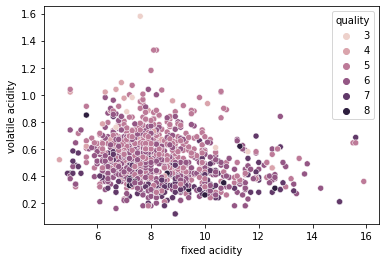

In [ ]:
sns.scatterplot(data = df, x = "fixed acidity", y = "volatile acidity", hue = "quality")

In [ ]:
# Those with higher volatile acidity had better quality.
# While those with a fixed acidity, did not improve much.

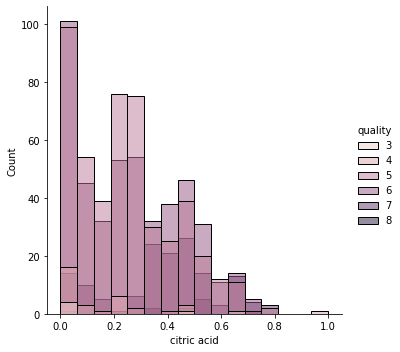

In [ ]:
sns.displot(data = df, x = "citric acid", hue = "quality")

In [ ]:
# Those between 0.2 & 0.6 had the most
# high quality

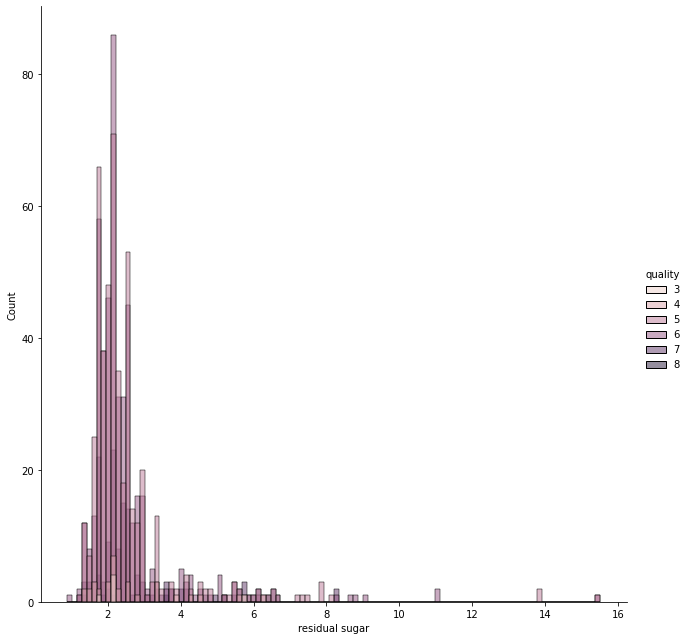

In [ ]:
sns.displot(data = df, x = "residual sugar", hue = "quality", height = 9)

In [ ]:
# Higher residual sugars led to more quality

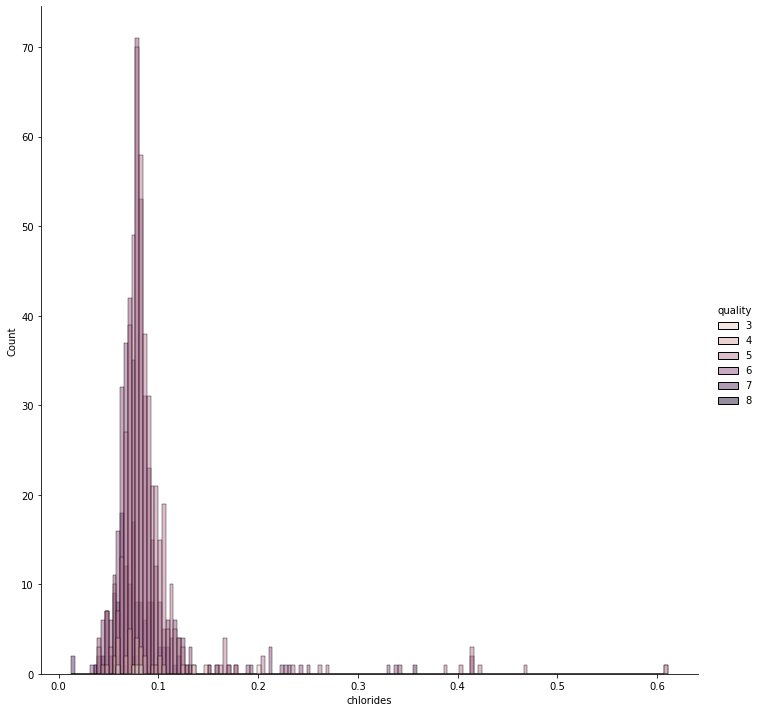

In [ ]:
sns.displot(data = df, x = "chlorides", hue = "quality", height = 10)

In [ ]:
# Higher chlorides, led to more quality in the wines.

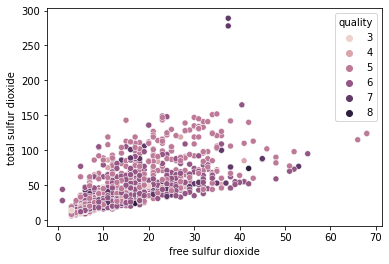

In [ ]:
sns.scatterplot(data = df, x = "free sulfur dioxide", y = "total sulfur dioxide", hue = "quality")

In [ ]:
# The best wines had low free sulfur levels, & low total sulfur levels.
# However higher total sulfur levels led to more quality

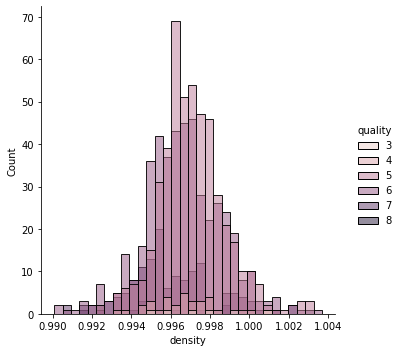

In [ ]:
sns.displot(data = df, x = "density", hue = "quality")

In [ ]:
# Wines beterrn 0.994 & 0.999 had the best qualities.

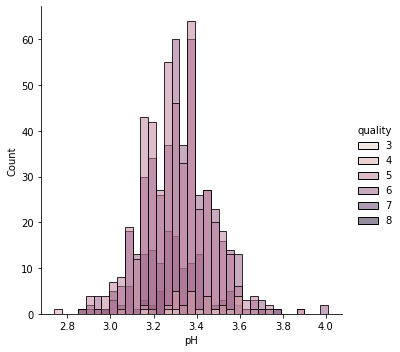

In [ ]:
sns.displot(data = df, x = "pH", hue = "quality")

In [ ]:
# Lower pH levels led to more quality.

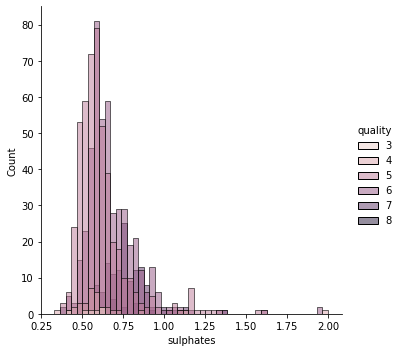

In [ ]:
sns.displot(data = df, x = "sulphates", hue = "quality")

In [ ]:
# Lower levels of sulfates led to more quality.

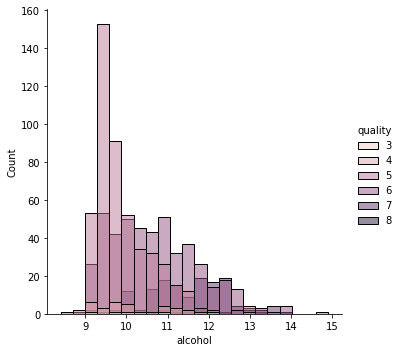

In [ ]:
sns.displot(data = df, x = "alcohol", hue = "quality")

In [ ]:
# Lower levels of alcohol had more quality.

In [ ]:
# We have a few indicators. But they are not clear cut indicators.
# They will provide us with some accuracy but not alot. That is why we are using neural
# networks.

## 6. Implementing the Solution

<a name = "implementing_solution">

X & Y

In [ ]:
X = df.drop("quality", axis = 1)
y = df["quality"]

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

Data scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Modelling

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
neural_network = MLPClassifier(hidden_layer_sizes = (11, 16, 16, 15, 11, 8, 4), activation = "tanh", max_iter = 1000000000, random_state = 101)
neural_network.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(11, 16, 16, 15, 11, 8, 4),
              max_iter=1000000000, random_state=101)

Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = neural_network.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.72      0.63      0.67       102
           6       0.54      0.62      0.58        91
           7       0.47      0.63      0.54        27
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.29      0.31      0.30       229
weighted avg       0.59      0.60      0.59       229



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This is not a bad score. Given that most of these are over 50%. When including the ones that have a score.

## Conclusion

<a name = "conclusion">

In conclusion we can estimate the quality of a 5th grade wine. However, we cannot estimate the quality of the other wine grades. This mostly due to lack of information. As the 6th & 7th grade, were quite well estimated. However, since it's only about 50%. I don't think we can estimate wine grades very well with a model. Especially since the best estimated was just the center grade, with grade 5. This is why I believe wine tasting may be the best way to determine the grade of a wine.

## Recommendation

<a name = "recommendation">

I recommend that the companies determine wine grades. By testing them. As this will produce more accurate results. However, as a prediagnostic they can use this model. But in the future, I believe models will be better at determining the quality of a wine. Especially if we get more variables, and we get more data for each wine quality.

## 9. Follow up questions

<a name = "follow_questions">

### a). Did we have the right data?

Yes, I believe we had the right data. As we wanted to determine the quality of a wine.

### b). Do we need other data to answer our question?

No, as we were able to get quite a high accuracy in one of the grades. However, we do need to get more variables that will allow us to differentiate the grades of the wine better.

### c). Did we have the right question?

Yes, I believe we had the right question. As the data is centred around wine grades. So I believe we had the right data.

<br>
<center> <h4> <b> Copyright © Andrew Wairegi </b> </h4> </center>

